# Communicating Data Findings  [Ford GoBike System](https://s3.amazonaws.com/fordgobike-data/index.html)
 
## by  Aparna 
<br>
<br>

## Table of Contents
- [Introduction](#intro)
- [Gathering Data](#gather)
- [Assessing Data](#assess)
- [Quality Issues](#quality)
- [Cleaning Data](#clean)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Resources](#resources)    

<a id='intro'></a>
### Introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less.

In this project, I will perform an exploratory analysis on data provided by Ford GoBike service provider.

### Preliminary Wrangling

This document explores the Ford GoBike's trip data.In this project, we will focus on the record of individual trips taken in from January 2018 to April 2019.

Ford GoBike Data: https://s3.amazonaws.com/fordgobike-data/index.html.

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import calendar
import os
import glob
from requests import get
from os import makedirs, listdir 
import matplotlib.ticker as tick
from io import BytesIO
from zipfile import ZipFile
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

%matplotlib inline

<a id='gather'></a>
## Gathering Data

In [2]:
# create a directory for storing all the datasets
dir_saved = 'fordbike_data'
if not os.path.exists(dir_saved):
    os.makedirs(dir_saved)

In [3]:
# store the all the downloaded dataset in a directory created above
# dataset for the year 2018 (Jan-Dec)
urls = []
    
for month in range(1,13):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    ford_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    urls.append(ford_data_url)
    print('2018 -',month)
    
for month in range(1,5):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    ford_data_url = 'https://s3.amazonaws.com/fordgobike-data/2019' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    urls.append(ford_data_url)
    print('2019 -',month)
    

2018 - 1
2018 - 2
2018 - 3
2018 - 4
2018 - 5
2018 - 6
2018 - 7
2018 - 8
2018 - 9
2018 - 10
2018 - 11
2018 - 12
2019 - 1
2019 - 2
2019 - 3
2019 - 4


In [4]:
# get csv file from the zip file 
for url in urls:
    response = get(url)      
    unzipped_file = ZipFile(BytesIO(response.content))
    unzipped_file.extractall(dir_saved)

In [5]:
# Combine all the CSVs into One DataFrame 
combined_csv = []
for trip_data in glob.glob('fordbike_data/*.csv'):
    trips = pd.read_csv(trip_data)
    if trips.shape[1]<10:
        trips = pd.read_csv(trip_data, sep=';')
    combined_csv.append(trips)

df = pd.concat(combined_csv)

In [6]:
df.to_csv('fordgobike.csv')

<a id='assess'></a>
## Assessing Data

In [7]:
#Checking the first 10 rows
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


In [8]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734625 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               2734625 non-null int64
start_time                 2734625 non-null object
end_time                   2734625 non-null object
start_station_id           2722124 non-null float64
start_station_name         2722124 non-null object
start_station_latitude     2734625 non-null float64
start_station_longitude    2734625 non-null float64
end_station_id             2722124 non-null float64
end_station_name           2722124 non-null object
end_station_latitude       2734625 non-null float64
end_station_longitude      2734625 non-null float64
bike_id                    2734625 non-null int64
user_type                  2734625 non-null object
member_birth_year          2583000 non-null float64
member_gender              2583354 non-null object
bike_share_for_all_trip    2734625 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 354.7+ MB


In [9]:
# Checking for duplicates 
df.duplicated().sum()

0

In [10]:
#describe dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,2.734625e+06,2.722124e+06,2.734625e+06,2.734625e+06,2.722124e+06,2.734625e+06,2.734625e+06,2.734625e+06,2.583000e+06
mean,8.316217e+02,1.258610e+02,3.776825e+01,-1.223510e+02,1.243537e+02,3.776815e+01,-1.223497e+02,2.929797e+03,1.983616e+03
std,2.232948e+03,1.052229e+02,1.057828e-01,1.684623e-01,1.052322e+02,1.415466e-01,3.483115e-01,1.762695e+03,1.035014e+01
min,6.100000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,3.000000e+00,0.000000e+00,-1.224737e+02,1.100000e+01,1.878000e+03
25%,3.460000e+02,3.700000e+01,3.777041e+01,-1.224117e+02,3.300000e+01,3.777106e+01,-1.224113e+02,1.501000e+03,1.979000e+03
50%,5.500000e+02,9.200000e+01,3.778107e+01,-1.223974e+02,9.000000e+01,3.778107e+01,-1.223971e+02,2.835000e+03,1.986000e+03
75%,8.610000e+02,1.960000e+02,3.779728e+01,-1.222894e+02,1.960000e+02,3.779728e+01,-1.222902e+02,4.225000e+03,1.991000e+03
max,8.636600e+04,4.200000e+02,4.551000e+01,0.000000e+00,4.200000e+02,4.551000e+01,0.000000e+00,7.108000e+03,2.001000e+03


In [11]:
len(df)

2734625

In [12]:
df.member_birth_year.value_counts().index

Float64Index([1988.0, 1989.0, 1987.0, 1990.0, 1993.0, 1991.0, 1986.0, 1985.0,
              1992.0, 1984.0, 1994.0, 1983.0, 1982.0, 1995.0, 1980.0, 1981.0,
              1996.0, 1979.0, 1977.0, 1978.0, 1975.0, 1997.0, 1976.0, 1974.0,
              1973.0, 1971.0, 1998.0, 1968.0, 1972.0, 1965.0, 1970.0, 1969.0,
              1999.0, 1967.0, 1963.0, 1964.0, 1966.0, 1962.0, 1961.0, 1960.0,
              2000.0, 1959.0, 1958.0, 1957.0, 1956.0, 1954.0, 1952.0, 1955.0,
              1950.0, 1953.0, 1951.0, 1949.0, 1945.0, 1947.0, 1948.0, 1900.0,
              1943.0, 1931.0, 1942.0, 1946.0, 1933.0, 1936.0, 1944.0, 2001.0,
              1911.0, 1902.0, 1935.0, 1941.0, 1924.0, 1920.0, 1934.0, 1901.0,
              1939.0, 1938.0, 1940.0, 1932.0, 1896.0, 1888.0, 1927.0, 1928.0,
              1914.0, 1904.0, 1878.0, 1923.0, 1881.0, 1909.0, 1889.0, 1906.0,
              1930.0, 1903.0, 1886.0, 1910.0],
             dtype='float64')

Here so many members having birth year dates prior to 1900.This is a quality issue.

In [13]:
df.member_gender.value_counts()

Male      1902810
Female     637069
Other       43475
Name: member_gender, dtype: int64

<a id='quality'></a>
## Quality issues
 1  data type for start time and end time should be timestamp not object <br>
 2  data type for user type, gender and bike_share_for_all_trip should be set to category <br>
 3  datat type for bike id, start_station_id, end_station_id can be set to string <br>
 4  member birth year has dates prior to 1900 and change datatype to int <br>
 5  missing values in start_station_id,start_station_name,end_station_id,end_station_name,member_birth_year,member_gender <br>
 6  duration should be in minutes and add a column for distance in kms  <br>
 7  extracting the details such as month,day,hour from start_time column for future analysis.

<a id='clean'></a>
## Cleaning Data

In [14]:
# Create a copy of original dataframe 
clean_df = df.copy()

#### Define

Set appropriate data types for the columns (start time,end time,user type, gender,bike_share_for_all_trip,bike id, start_station_id, end_station_id)

#### Code 

In [15]:
# set dates to timestamps
clean_df.start_time = pd.to_datetime(clean_df.start_time)
clean_df.end_time = pd.to_datetime(clean_df.end_time)

# set bike id, start_station_id, end_station_id to string
clean_df.bike_id = clean_df.bike_id.astype(str)
clean_df.start_station_id = clean_df.bike_id.astype(str)
clean_df.end_station_id = clean_df.bike_id.astype(str)

# set user type, gender and bike_share_for_all_trip to category
clean_df.user_type = clean_df.user_type.astype('category')
clean_df.member_gender = clean_df.member_gender.astype('category')
clean_df.bike_share_for_all_trip = clean_df.bike_share_for_all_trip.astype('category')

#### Test

In [16]:
clean_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734625 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               2734625 non-null int64
start_time                 2734625 non-null datetime64[ns]
end_time                   2734625 non-null datetime64[ns]
start_station_id           2734625 non-null object
start_station_name         2722124 non-null object
start_station_latitude     2734625 non-null float64
start_station_longitude    2734625 non-null float64
end_station_id             2734625 non-null object
end_station_name           2722124 non-null object
end_station_latitude       2734625 non-null float64
end_station_longitude      2734625 non-null float64
bike_id                    2734625 non-null object
user_type                  2734625 non-null category
member_birth_year          2583000 non-null float64
member_gender              2583354 non-null category
bike_share_for_all_trip    2734625 non-null category
dtypes: category(3), datetime64[ns](2), float6

#### Define
 Calculating age by subtractiing member_birth_year from current year

#### Code

In [17]:
# substract the birth year from the current year
clean_df['member_age'] = 2019-clean_df['member_birth_year']

#### Test

In [18]:
clean_df.tail(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
239106,184,2019-04-01 00:09:17.566,2019-04-01 00:12:22.517,6430,Valencia St at 22nd St,37.755213,-122.420975,6430,24th St at Chattanooga St,37.751819,-122.426614,6430,Subscriber,1976.0,Male,No,43.0
239107,539,2019-04-01 00:03:02.573,2019-04-01 00:12:02.067,4972,Folsom St at 9th St,37.773717,-122.411647,4972,11th St at Natoma St,37.773507,-122.416040,4972,Subscriber,1981.0,Male,Yes,38.0
239108,292,2019-04-01 00:06:04.237,2019-04-01 00:10:56.985,3415,Bancroft Way at College Ave,37.869360,-122.254337,3415,Telegraph Ave at Carleton St,37.862320,-122.258801,3415,Subscriber,1997.0,Male,Yes,22.0
239109,471,2019-04-01 00:01:38.411,2019-04-01 00:09:29.965,5018,Jones St at Post St,37.787327,-122.413278,5018,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5018,Subscriber,1996.0,Female,Yes,23.0
239110,356,2019-04-01 00:00:28.729,2019-04-01 00:06:25.065,5956,Clay St at Battery St,37.795001,-122.399970,5956,Lombard St at Columbus Ave,37.802746,-122.413579,5956,Subscriber,1970.0,Male,No,49.0


In [19]:
# Check age distrubition
clean_df['member_age'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95])

count    2.583000e+06
mean     3.538395e+01
std      1.035014e+01
min      1.800000e+01
10%      2.500000e+01
20%      2.700000e+01
30%      2.900000e+01
40%      3.100000e+01
50%      3.300000e+01
60%      3.500000e+01
70%      3.800000e+01
75%      4.000000e+01
80%      4.300000e+01
90%      5.100000e+01
95%      5.600000e+01
max      1.410000e+02
Name: member_age, dtype: float64

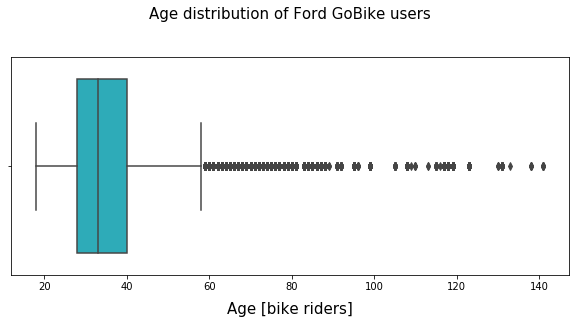

In [20]:
#code for boxplot
plt.figure(figsize=(10,4))
sns.boxplot(x='member_age', data=clean_df, color=sns.color_palette()[9], orient='h')
plt.title("Age distribution of Ford GoBike users", fontsize=15, y=1.15)
plt.xlabel("Age [bike riders]", fontsize=15, labelpad=10)
plt.savefig('member_age.png');

Here is the distrubition of users. Ages below 60 takes 95% of the users. There were users more than 100 years old. So, we can remove users more than 60 years old.

In [21]:
clean_df = clean_df[clean_df['member_age']<=60]

In [22]:
clean_df['member_age'].mean()

34.61956989741829

##### Ford bike user's mean age is around 34-35

In [23]:
# change age and birth year to integer
clean_df.member_age = clean_df.member_age.astype(int)
clean_df.member_birth_year = clean_df.member_birth_year.astype(int)

In [24]:
clean_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522282 entries, 0 to 239110
Data columns (total 17 columns):
duration_sec               2522282 non-null int64
start_time                 2522282 non-null datetime64[ns]
end_time                   2522282 non-null datetime64[ns]
start_station_id           2522282 non-null object
start_station_name         2510173 non-null object
start_station_latitude     2522282 non-null float64
start_station_longitude    2522282 non-null float64
end_station_id             2522282 non-null object
end_station_name           2510173 non-null object
end_station_latitude       2522282 non-null float64
end_station_longitude      2522282 non-null float64
bike_id                    2522282 non-null object
user_type                  2522282 non-null category
member_birth_year          2522282 non-null int32
member_gender              2522282 non-null category
bike_share_for_all_trip    2522282 non-null category
member_age                 2522282 non-null int3

In [25]:
# Checking
clean_df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age
count,2.522282e+06,2.522282e+06,2.522282e+06,2.522282e+06,2.522282e+06,2.522282e+06,2.522282e+06
mean,7.671510e+02,3.776782e+01,-1.223500e+02,3.776768e+01,-1.223487e+02,1.984380e+03,3.461957e+01
std,1.911705e+03,1.070817e-01,1.725802e-01,1.451080e-01,3.613167e-01,9.085826e+00,9.085826e+00
min,6.100000e+01,0.000000e+00,-1.224737e+02,0.000000e+00,-1.224737e+02,1.959000e+03,1.800000e+01
25%,3.410000e+02,3.777041e+01,-1.224117e+02,3.777106e+01,-1.224108e+02,1.979000e+03,2.800000e+01
50%,5.390000e+02,3.778101e+01,-1.223974e+02,3.778107e+01,-1.223971e+02,1.986000e+03,3.300000e+01
75%,8.360000e+02,3.779728e+01,-1.222856e+02,3.779728e+01,-1.222887e+02,1.991000e+03,4.000000e+01
max,8.628100e+04,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00,2.001000e+03,6.000000e+01


In [26]:
print(clean_df.shape)
print(clean_df.dtypes)

(2522282, 17)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip          category
member_age                          int32
dtype: object


##### Define 
Removing the missing values

##### Code

In [27]:
clean_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522282 entries, 0 to 239110
Data columns (total 17 columns):
duration_sec               2522282 non-null int64
start_time                 2522282 non-null datetime64[ns]
end_time                   2522282 non-null datetime64[ns]
start_station_id           2522282 non-null object
start_station_name         2510173 non-null object
start_station_latitude     2522282 non-null float64
start_station_longitude    2522282 non-null float64
end_station_id             2522282 non-null object
end_station_name           2510173 non-null object
end_station_latitude       2522282 non-null float64
end_station_longitude      2522282 non-null float64
bike_id                    2522282 non-null object
user_type                  2522282 non-null category
member_birth_year          2522282 non-null int32
member_gender              2522282 non-null category
bike_share_for_all_trip    2522282 non-null category
member_age                 2522282 non-null int3

In [28]:
clean_df.dropna(axis=0, inplace=True)

##### Test

In [29]:
clean_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2510173 entries, 0 to 239110
Data columns (total 17 columns):
duration_sec               2510173 non-null int64
start_time                 2510173 non-null datetime64[ns]
end_time                   2510173 non-null datetime64[ns]
start_station_id           2510173 non-null object
start_station_name         2510173 non-null object
start_station_latitude     2510173 non-null float64
start_station_longitude    2510173 non-null float64
end_station_id             2510173 non-null object
end_station_name           2510173 non-null object
end_station_latitude       2510173 non-null float64
end_station_longitude      2510173 non-null float64
bike_id                    2510173 non-null object
user_type                  2510173 non-null category
member_birth_year          2510173 non-null int32
member_gender              2510173 non-null category
bike_share_for_all_trip    2510173 non-null category
member_age                 2510173 non-null int3

##### Define
 Changing duration in seconds to duration in minutes.Create a new column for distance in kms.

##### Code

In [30]:
clean_df['duration_min'] = clean_df['duration_sec']/60
clean_df['duration_min'] = clean_df['duration_min'].astype(int)

In [31]:
# extracting distance in km based on longitude and latitude 

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [32]:
# add a new column for distance in km
clean_df['distance_km']= clean_df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

##### Test

In [33]:
clean_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,distance_km
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No,33,1254,2.492254
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No,23,1192,2.974502
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No,28,666,2.440571
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,3571,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,3571,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No,31,7,1.341918
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,1403,Berry St at 4th St,37.775880,-122.393170,1403,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No,39,3,0.632718


##### Define 
Extracting the details such as month,day,hour from start_time column.

##### Code

In [34]:
# Extracting Start and end time hour
clean_df['start_time_hour'] = clean_df['start_time'].dt.hour
clean_df['start_time_weekday'] = clean_df['start_time'].dt.strftime('%a') # weekday
clean_df['start_time_year_month']=clean_df['start_time'].map(lambda x: x.strftime('%Y-%m')) # year-month format

##### Test

In [35]:
clean_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,distance_km,start_time_hour,start_time_weekday,start_time_year_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,...,Subscriber,1986,Male,No,33,1254,2.492254,22,Wed,2018-01
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,...,Customer,1996,Male,No,23,1192,2.974502,14,Wed,2018-01
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,...,Subscriber,1991,Male,No,28,666,2.440571,19,Wed,2018-01
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,3571,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,3571,Valencia St at 24th St,37.752428,...,Subscriber,1988,Male,No,31,7,1.341918,23,Wed,2018-01
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,1403,Berry St at 4th St,37.775880,-122.393170,1403,4th St at Mission Bay Blvd S,37.770407,...,Subscriber,1980,Male,No,39,3,0.632718,23,Wed,2018-01


In [36]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2510173 entries, 0 to 239110
Data columns (total 22 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          int32
member_gender              category
bike_share_for_all_trip    category
member_age                 int32
duration_min               int32
distance_km                float64
start_time_hour            int64
start_time_weekday         object
start_time_year_month      object
dtypes: category(3), datetime64[ns](2), float64(5), int32(3), int64(2), object(7)
memory usage: 361.5+ MB


In [37]:
# save cleaned data 
clean_df.to_csv('master_df.csv', index=False)

### What is the structure of your dataset?

   There are  239111 rides in the dataset for the year 2018 and 2019(first 4 months only) with 16 features 
   * duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip.

The dataset was further enhanced for analysis by adding columns 
   * member_age, duration_min,distance_km, start_time_hour, start_time_weekday,start_time_year_month.

### What is/are the main feature(s) of interest in your dataset?

The features i am interested in
 * The duration of bike ride, distance covered, gender,user_type,age group and demand at various days and months and hours based on user type and gender.
 * Moreover which gender uses the service the most and if the service is mostly used by members or casual riders.
 * Checking the realtionship between the numeric variables(member_age, distance and duration)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect the features which will support my analysis are 
 * duration_min,distance_km, gender, user_type, start_time_year_month, start_time_weekday and member_age

<a id='univariate'></a>
## Univariate Exploration

In this section we are going to investigate distributions of individual variables.We have to make a clear idea by observing the relationships between variables.

In [38]:
sns.set_style('darkgrid')

### Question 1 : Which gender uses the Ford GoBike service more?

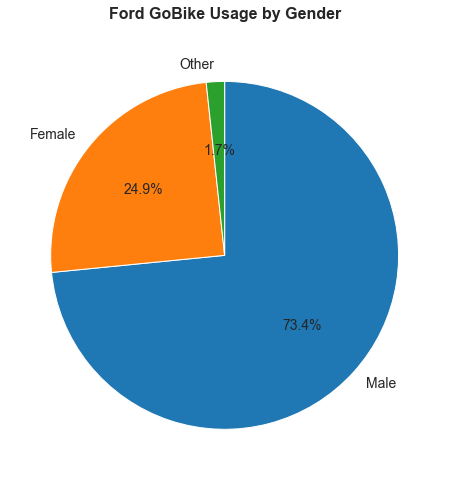

In [39]:
#Pie chart for Gender usage of the Ford GoBike service
plt.figure(figsize=(11,8))
plt.title('Ford GoBike Usage by Gender',fontsize=16, y=1.03,fontweight='semibold')
plt.pie(clean_df['member_gender'].value_counts(),labels = clean_df['member_gender'].value_counts().index,
        startangle = 90,autopct='%1.1f%%',counterclock=False,textprops={'fontsize': 14});

### Observation
##### Most bike riders are Males.

### Question 2 : Which user type uses Ford GoBike service more?

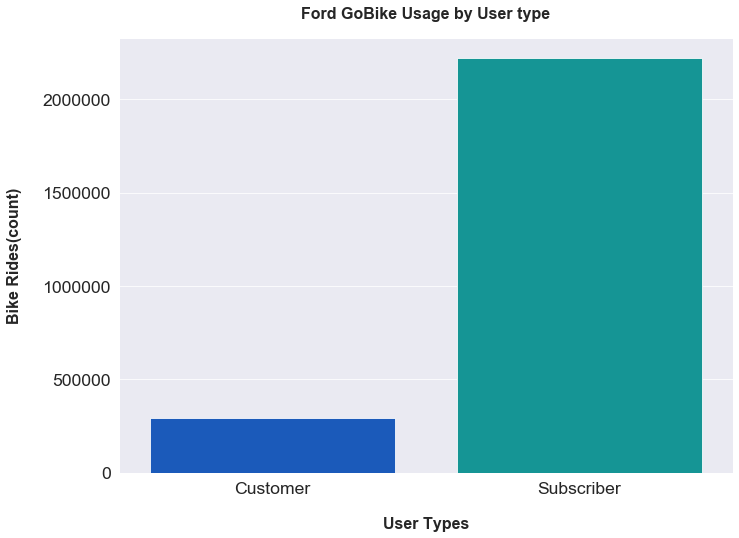

In [40]:
##Bar chart for User Type usage of the Ford Gobike service
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
sns.countplot(x='user_type',palette='winter', data=clean_df.sort_values(by='user_type'))
plt.title('Ford GoBike Usage by User type', fontsize=16, y=1.03,fontweight='bold')
plt.xlabel('User Types', labelpad=20, fontweight='bold',fontsize=16)
plt.ylabel('Bike Rides(count)', labelpad=20, fontweight='bold',fontsize=16);

### Observation
#####  Ford GoBike is most used by Subscribers.

### Question 3 : Which age group uses Ford Gobike service more?

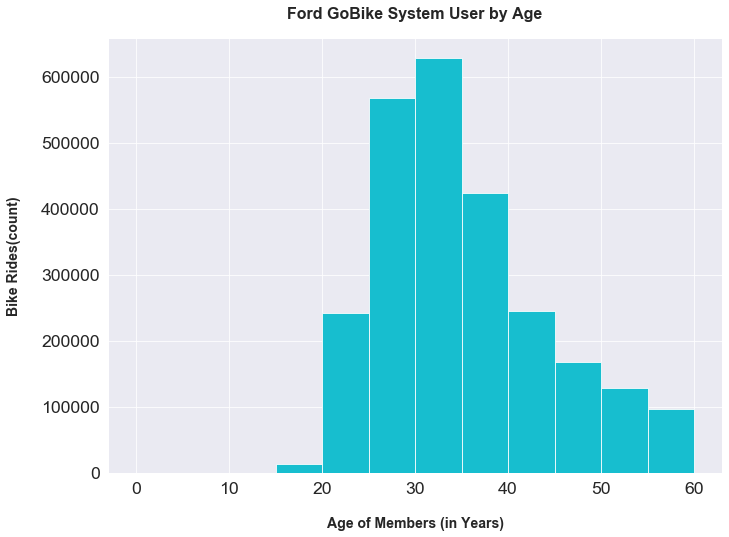

In [41]:
## plotting graph for usage of Ford Gobike service vs.age group
plt.figure(figsize=[11, 8])
sns.set_context("paper", font_scale=2) 
binsize = 5
bins = np.arange(0, clean_df['member_age'].max()+binsize, binsize)
plt.hist(data = clean_df, x = 'member_age', bins = bins,color=sns.color_palette()[9] )
plt.title("Ford GoBike System User by Age",fontweight='bold',fontsize=16, y=1.03)
plt.xlabel('Age of Members (in Years)',labelpad=20, fontweight='bold',fontsize=14)
plt.ylabel('Bike Rides(count)',labelpad=20, fontweight='bold',fontsize=14);

### Observation
##### From above visualization the majority of the users are in the age group between 25-40 years.

### Question 4 : What is the trip duration in minutes of the Ford GoBike service?

In [42]:
clean_df.duration_min.describe()

count    2.510173e+06
mean     1.223539e+01
std      3.136418e+01
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.300000e+01
max      1.438000e+03
Name: duration_min, dtype: float64

In [43]:
clean_df.query('duration_min > 30').count()[0]/clean_df.count()[0]

0.036934107728829844

From above we can clearly understand that small percentage of the trips are longer than 30 mins.So i decide to focus on the rides within 30 mins for further analysis.

In [44]:
clean_df = clean_df[clean_df.duration_min <= 30]

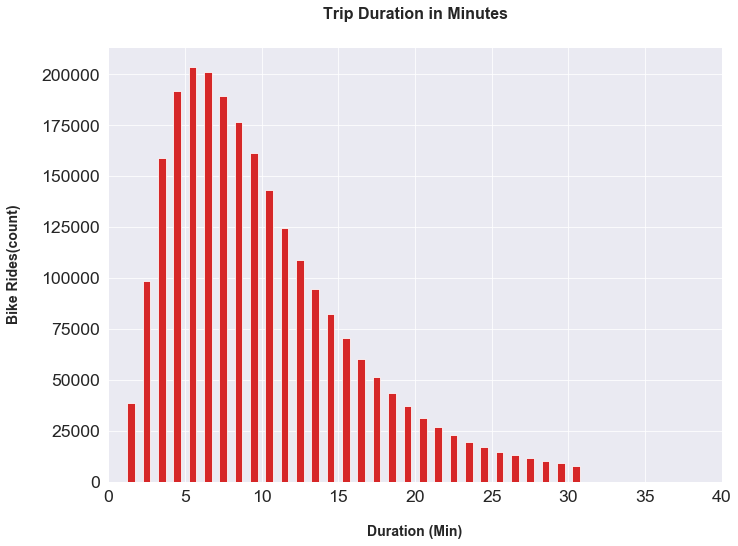

In [45]:
## trip duration of Ford Gobike service 
binsize = 1
bins = np.arange(0,40, binsize)
plt.figure(figsize=[11, 8])
sns.set_context("paper", font_scale=2) 
plt.hist(data = clean_df, x = 'duration_min', bins = bins,rwidth=0.5 ,color = sns.color_palette()[3])
plt.title("Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)',labelpad=20, fontweight='bold',fontsize=14)
plt.ylabel('Bike Rides(count)',labelpad=20, fontweight='bold',fontsize=14)
plt.xlim(0,40);

### Observation
##### The duration (in mins) for most of the rides are within 15 mins. This shows that users prefer bike rides for smaller durations.

### Question 5: Check the distance in kms of Ford GoBike service?

In [46]:
clean_df.distance_km.describe()

count    2.417462e+06
mean     1.715343e+00
std      3.394095e+01
min      0.000000e+00
25%      8.980624e-01
50%      1.402130e+00
75%      2.121257e+00
max      1.279835e+04
Name: distance_km, dtype: float64

From above describe() shows that 75% of rides have distance below 3km. 

In [47]:
# Just explore distance<5km
clean_df = clean_df[(clean_df.distance_km<5) & (clean_df.distance_km>0)]

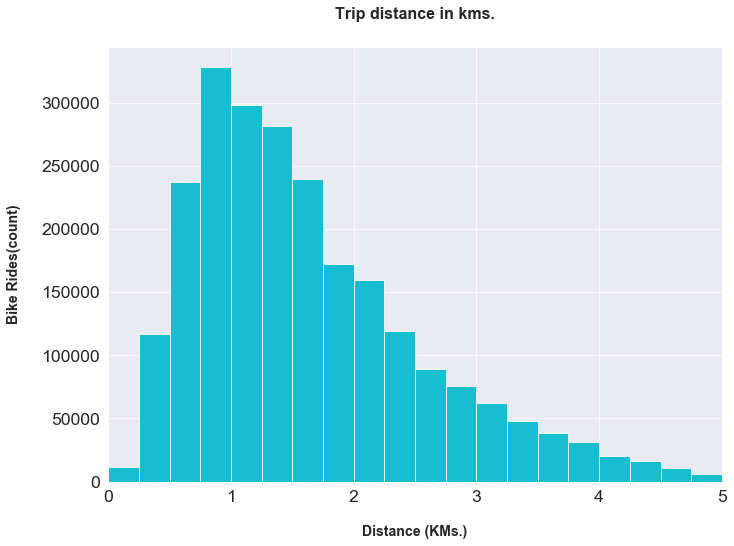

In [48]:
# draw a histogram on distance
bin_edges = np.arange(0, 5+0.25, 0.25)
plt.figure(figsize=[11, 8])
sns.set_context("paper", font_scale= 2) 
plt.hist(data = clean_df, x = 'distance_km', bins = bin_edges,color = sns.color_palette()[9])
plt.title("Trip distance in kms.", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (KMs.)',labelpad=20, fontweight='bold',fontsize=14)
plt.ylabel('Bike Rides(count)',labelpad=20, fontweight='bold',fontsize=14);
plt.xlim(0,5);

### Observation
 ##### Longer trip distance are between 0.5kms to 2.5kms. 

### Question 6 : The trends relating to month, weekday and hour wise usage of Ford GoBike service?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

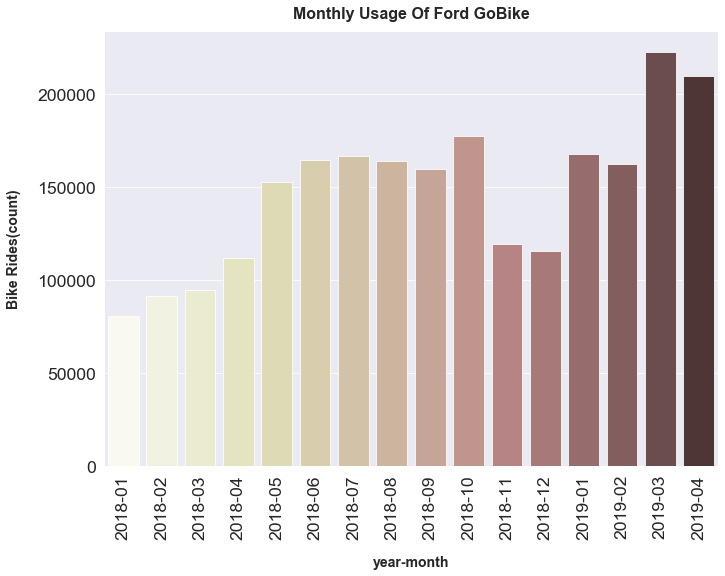

In [49]:
# Ford GoBike Usage of Month
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
sns.countplot(x='start_time_year_month', palette="pink_r", data=clean_df.sort_values(by='start_time_year_month'))
plt.title('Monthly Usage Of Ford GoBike', fontsize=16, y=1.015,fontweight='bold')
plt.xlabel('year-month', labelpad=16, fontweight='bold',fontsize=14)
plt.ylabel('Bike Rides(count)', labelpad=16,fontweight='bold',fontsize=14);
plt.xticks(rotation=90)

### Observation
##### The Ford GoBike is mostly used in the months of March and April of the year 2019.

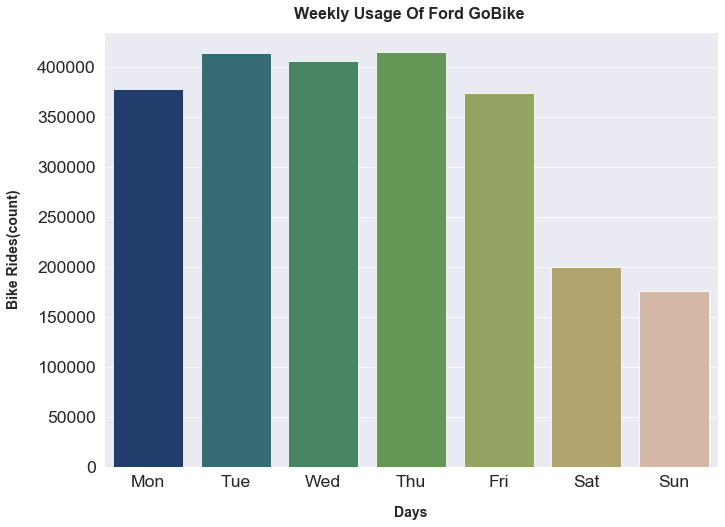

In [50]:
# Ford GoBike Usage of weekdays
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(x='start_time_weekday',palette='gist_earth', data=clean_df, order = weekday)
plt.title('Weekly Usage Of Ford GoBike ', fontsize=16, y=1.015,fontweight='bold')
plt.xlabel('Days', labelpad=16, fontweight='bold',fontsize=14)
plt.ylabel('Bike Rides(count)', labelpad=16,fontweight='bold',fontsize=14);

### Observation
#####  Ford GoBike is mainly used in weekdays and less used in the weekend.Mostly used in Thursday and Tuesday.

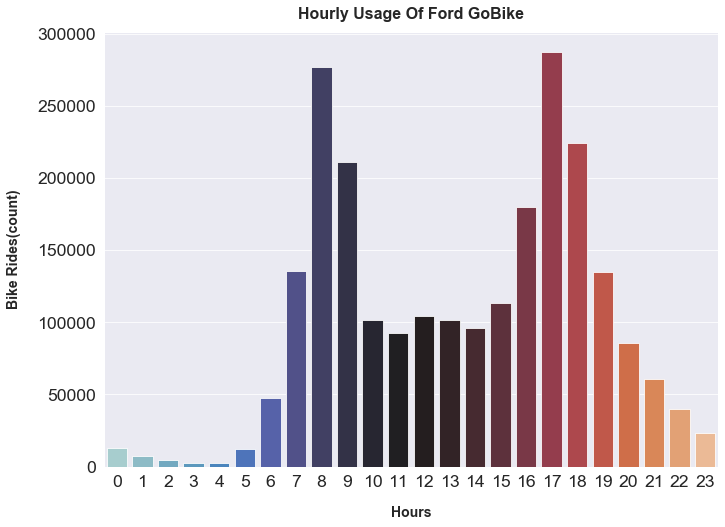

In [51]:
# Hourly usage of Ford GoBike 
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
sns.countplot(x='start_time_hour',palette='icefire', data=clean_df.sort_values(by='start_time_hour'))
plt.title('Hourly Usage Of Ford GoBike', fontsize=16, y=1.015,fontweight='bold')
plt.xlabel('Hours', labelpad=16, fontweight='bold',fontsize=14)
plt.ylabel('Bike Rides(count)', labelpad=16,fontweight='bold',fontsize=14);

### Observation
##### The Ford GoBike system is mostly used in the hours 8am-9am and 5pm-6pm.So we can conclude that this service is mainly used by workers to commute.

### Question 7: Check the Bike share for all trip of Ford GoBike service?

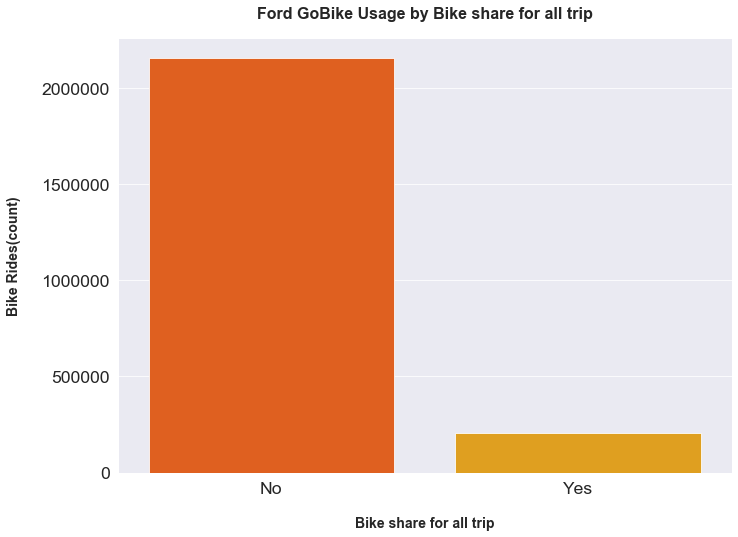

In [52]:
##Bar chart for Bike share for all trip usage of the Ford Gobike service
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
sns.countplot(x='bike_share_for_all_trip',palette='autumn', data=clean_df)
plt.title('Ford GoBike Usage by Bike share for all trip', fontsize=16, y=1.03,fontweight='bold')
plt.xlabel('Bike share for all trip', labelpad=20, fontweight='bold',fontsize=14)
plt.ylabel('Bike Rides(count)', labelpad=20, fontweight='bold',fontsize=14);

### Observation
 ##### Users only use Ford GoBike service for part of the trip, they rarely use it for the entire trip.

### Discuss the distribution(s) of your variable(s) of interest. 

##### Findings 
- Ford GoBike service mostly used by the gender Males and by the user type Subscribers.
- Majority of the Ford GoBike service users are in the age group between 25-40 years.
- The duration (in mins) for most of the rides are within 15 mins.
- The longest distance for this service is in between 0.5kms to 2kms.
- The Ford GoBike is mostly used in the months of March and April of the year 2019.
- Ford GoBike is mainly used in weekdays and less used in the weekend.Mostly used in Thursday and Tuesday.
- The Ford GoBike system is mostly used in the hours 8am-9am and 5pm-6pm.
- Users only use Ford GoBike sharing service for part of the trip, they rarely use it for the entire trip.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

-  From prevoius analysis we can conclude that small percentage of the trip's durtion is longer than 30 mins.So i decided to focus on the trips within 30 mins duration for further analysis.

<a id='univariate'></a>
## Bivariate Exploration

In this section we are going to investigate relationships between pairs of variables of our data. 

### Question 1: Explore the trends and relations of Ford GoBike service  with the duration, distance, hourly usage, weekly usage, monthly usage, member age vs. Gender

### Exploring the trends of Ford GoBike service with the duration vs.Gender

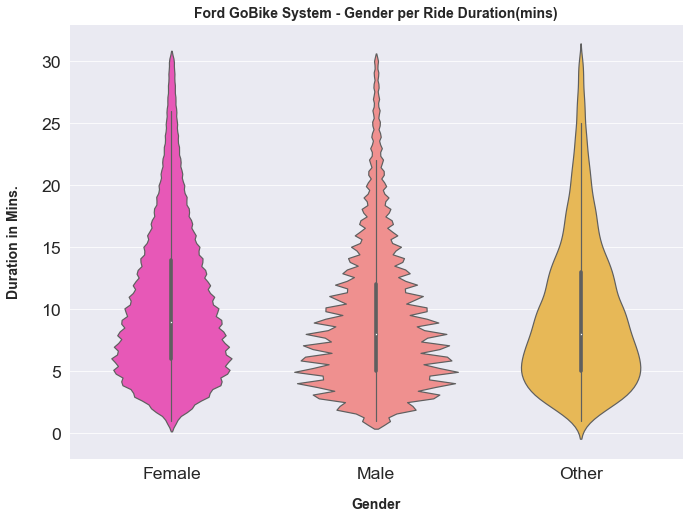

In [53]:
# Violinplot to observe duration in mins of rides per gender 
plt.figure(figsize=(11,8))
sns.violinplot(data = clean_df, x = 'member_gender', y = 'duration_min',palette= 'spring')
sns.set_context("paper", font_scale=2) 
plt.title('Ford GoBike System - Gender per Ride Duration(mins)',fontsize=14,fontweight='bold')
plt.xlabel('Gender', labelpad=16, fontweight='bold',fontsize=14)
plt.ylabel('Duration in Mins.', labelpad=20,fontweight='bold',fontsize=14);

### Observation
Rides by males are more centred around shorter duration.

### Exploring the trends of Ford GoBike service with the distance vs.Gender

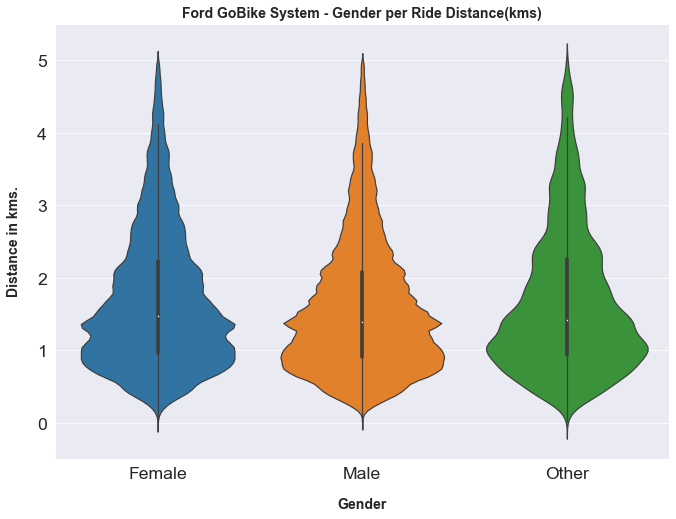

In [54]:
# Violinplot to observe distance of rides per gender 
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
sns.violinplot(data = clean_df, x = 'member_gender', y = 'distance_km')
plt.title('Ford GoBike System - Gender per Ride Distance(kms)',fontsize=14,fontweight='bold')
plt.xlabel('Gender', labelpad=16, fontweight='bold',fontsize=14)
plt.ylabel('Distance in kms.', labelpad=16, fontweight='bold',fontsize=14);

### Observation
Rides by males are more centred around shorter distance

### Exploring the trends of Hourly usage of Ford GoBike service vs.Gender

<Figure size 792x576 with 0 Axes>

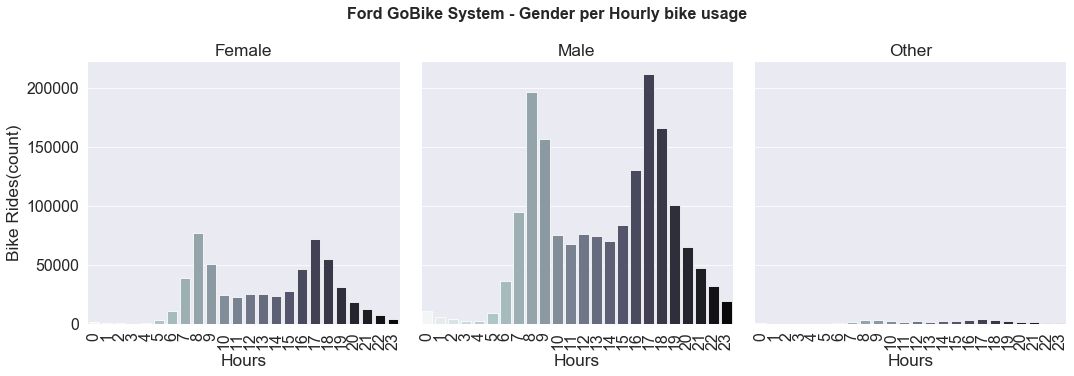

In [55]:
#Bar charts to check gender wise hourly usage of Ford GoBike 
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=1.8) 
g = sns.catplot( data=clean_df, x='start_time_hour', col="member_gender", kind='count', sharey = True, palette='bone_r');
g.set_axis_labels("Hours", "Bike Rides(count)");
g.set_titles("{col_name}");
g.fig.suptitle('Ford GoBike System - Gender per Hourly bike usage', y=1.05, fontsize=16, fontweight='bold');
g.set_xticklabels(rotation=90);

### Exploring the trends of Weekly usage of Ford GoBike service vs.Gender

<Figure size 792x576 with 0 Axes>

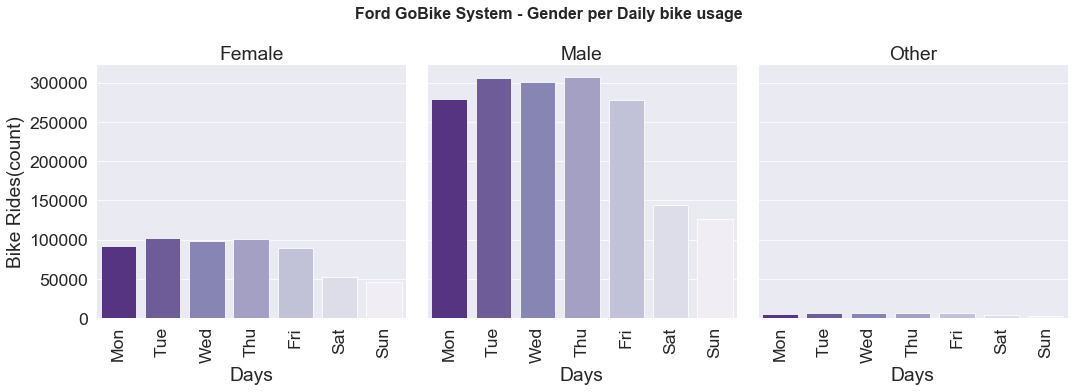

In [56]:
#Bar charts to check gender per weekday Ford GoBike usage
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=clean_df, x='start_time_weekday', col="member_gender", kind='count', sharey = True, palette='Purples_r',order=weekday);
g.set_axis_labels("Days", "Bike Rides(count)");
g.set_titles("{col_name}");
g.fig.suptitle('Ford GoBike System - Gender per Daily bike usage', y=1.05, fontsize=16, fontweight='bold');
g.set_xticklabels(rotation=90);

### Observation
The weekdays usage trends showing that the males are mostly used the Ford GoBike service compared to females and other category.

### Exploring the trends of Monthly usage of Ford GoBike service vs.Gender

<Figure size 792x576 with 0 Axes>

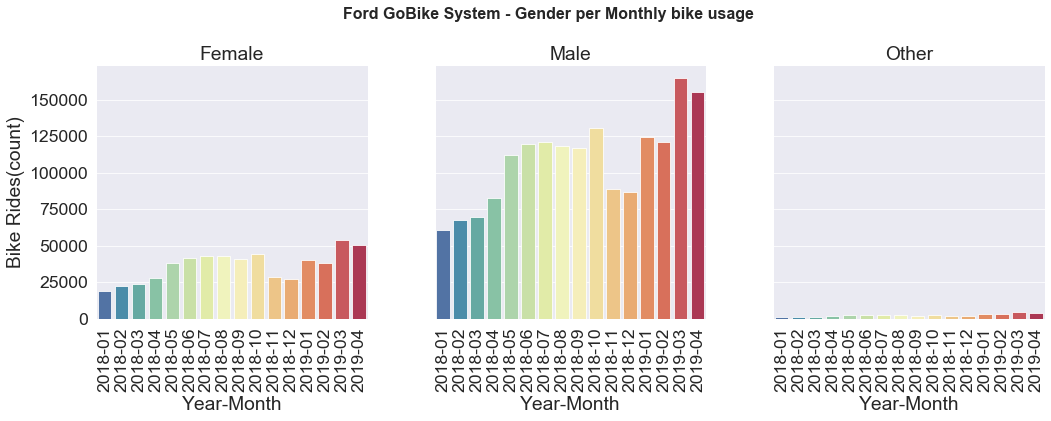

In [57]:
#Bar charts to check gender wise monthly usage of Ford GoBike 
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
g = sns.catplot(data=clean_df, x='start_time_year_month', col="member_gender", kind='count', sharey = True, palette='Spectral_r');
g.set_axis_labels("Year-Month", "Bike Rides(count)");
g.set_titles("{col_name}");
g.fig.suptitle('Ford GoBike System - Gender per Monthly bike usage', y=1.05, fontsize=16, fontweight='bold');
g.set_xticklabels(rotation=90);

### Observation
The monthly trends showing that the males are mostly used the Ford GoBike service compared to females and other category.

### Exploring the trends of Ford GoBike service with member age vs.Gender

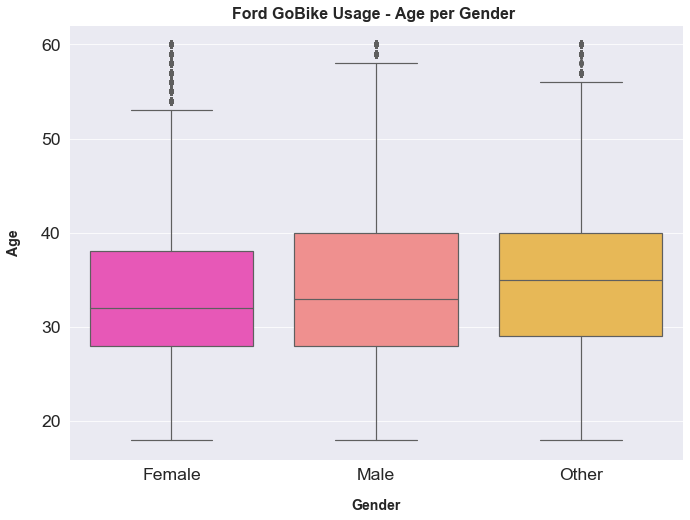

In [58]:
# Frod Gobike usage - Age per Gender
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
sns.boxplot(data = clean_df, x = 'member_gender', y = 'member_age',palette= 'spring');
plt.title('Ford GoBike Usage - Age per Gender ',fontsize=16,fontweight='bold')
plt.xlabel('Gender', labelpad=16, fontweight='bold',fontsize=14)
plt.ylabel('Age', labelpad=20,fontweight='bold',fontsize=14);

### Observation
Males contains more members in the age group 25-40 compared to females and others

## Conclusion
- Rides by males are more centred around shorter duration and distance.
- The hourly,monthly,weekly trends showing that the males are mostly used the Ford GoBike service compared to females and other category.And it follows the same pattern we saw in the univariate exploration.
- The same trends also following the age group also. Males contains more members in the age group 25-40 compared to females and others. 

### Question 2: Explore the trends and relationships of Ford GoBike rides with the duration, distance, hourly usage, weekly usage, monthly usage, member age vs. User type.

### Explore the trends and relationships of Ford GoBike rides with the duration vs. User type

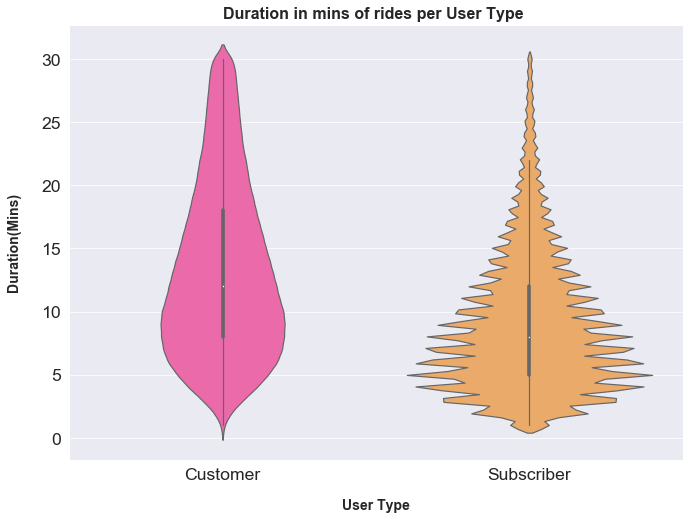

In [59]:
# Violin Plot to observe duration(mins) of rides per user type
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
sns.violinplot(data = clean_df, x = 'user_type', y = 'duration_min',palette= 'spring');
plt.title('Duration in mins of rides per User Type ',fontsize=16,fontweight='bold')
plt.xlabel('User Type', labelpad=16, fontweight='bold',fontsize=14)
plt.ylabel('Duration(Mins)', labelpad=20,fontweight='bold',fontsize=14);

### Observation
Rides by subscribers are more centred around shorter duration 

### Exploring the trends of Ford GoBike rides with the distance vs. User type

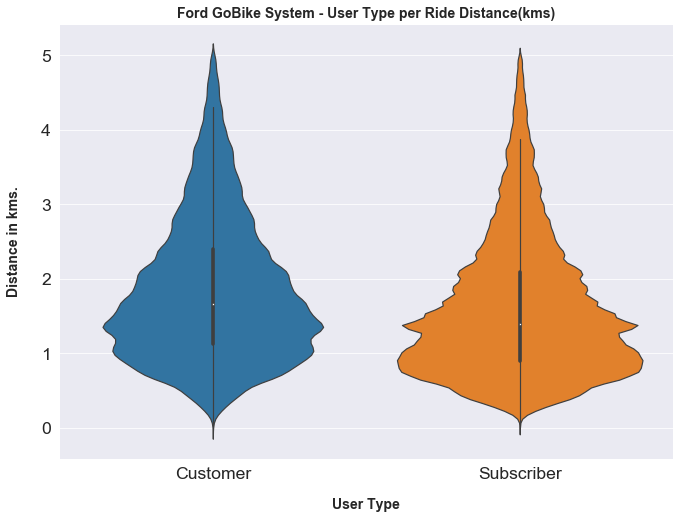

In [60]:
# Violinplot to observe distance of rides per gender 
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
sns.violinplot(data = clean_df, x = 'user_type', y = 'distance_km')
plt.title('Ford GoBike System - User Type per Ride Distance(kms)',fontsize=14,fontweight='bold')
plt.xlabel('User Type', labelpad=16, fontweight='bold',fontsize=14)
plt.ylabel('Distance in kms.', labelpad=20,fontweight='bold',fontsize=14);

### Observation
Rides by subscribers are more centred around shorter distance 

### Explore the trends Hourly usage of Ford GoBike service vs. User type

<Figure size 1008x576 with 0 Axes>

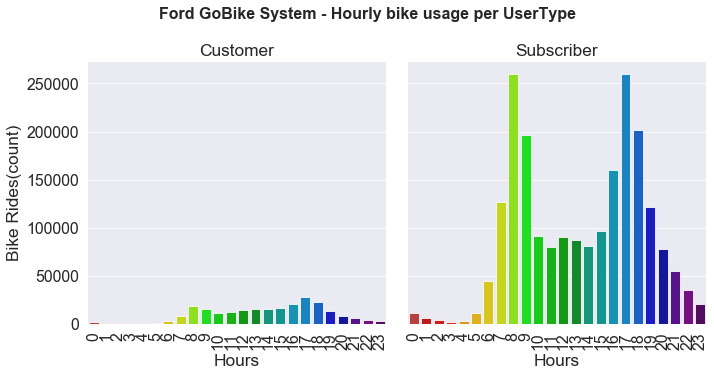

In [61]:
#Bar charts to check user type wise hourly usage of Ford GoBike 
plt.figure(figsize=(14,8))
sns.set_context("paper", font_scale=1.8) 
g = sns.factorplot(data=clean_df, x='start_time_hour', col="user_type", kind='count', sharey = True, palette='nipy_spectral_r');
g.set_axis_labels("Hours", "Bike Rides(count)");
g.set_titles("{col_name}");
g.fig.suptitle('Ford GoBike System - Hourly bike usage per UserType', y=1.05, fontsize=16, fontweight='bold');
g.set_xticklabels(rotation=90);

### Observation
The hourly trend shows that for subscribers majority of the rides are taken during hours 8-9am and 5-6pm whereas for the customers the majority of the rides are taken from 11am to 7pm.

### Explore the trends Weekly usage of Ford GoBike service vs. User type

<Figure size 792x576 with 0 Axes>

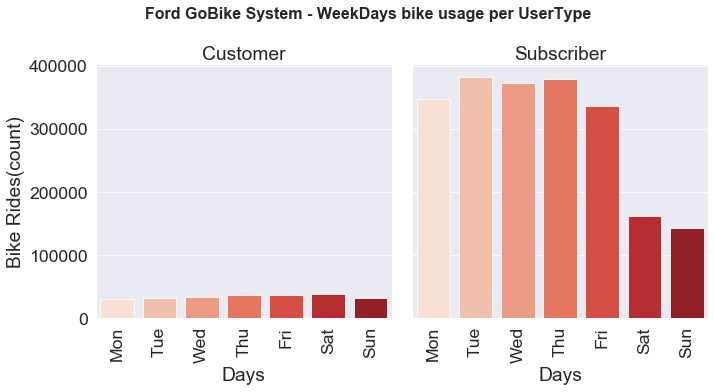

In [62]:
#Bar charts to check usertype per weekdays Ford GoBike usage
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=clean_df, x='start_time_weekday', col="user_type", kind='count', sharey = True, palette='Reds',order=weekday);
g.set_axis_labels("Days", "Bike Rides(count)");
g.set_titles("{col_name}");
g.fig.suptitle('Ford GoBike System - WeekDays bike usage per UserType', y=1.05, fontsize=16, fontweight='bold');
g.set_xticklabels(rotation=90);

### Observation
The weekly usage shows that subcribers take the rides mostly between days Monday to Friday whereas the customers mostly take the rides on Saturday and Sunday. This shows that subscribers are taking the ride to commute whereas customers are taking the rides to enjoy their weekends.

### Explore the trends Monthly usage of Ford GoBike service vs. User type

<Figure size 792x576 with 0 Axes>

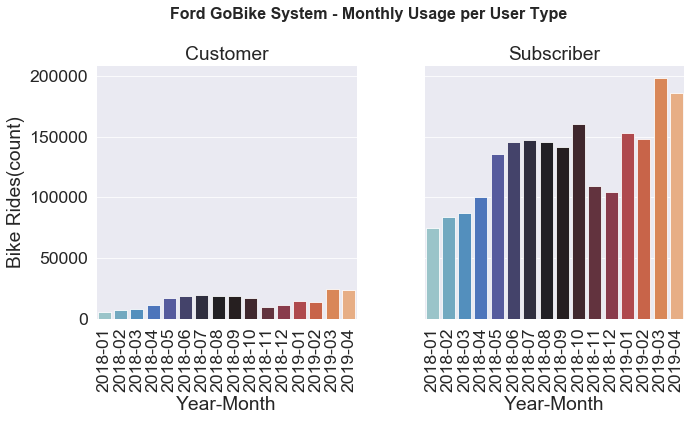

In [63]:
#Bar charts to check monthly bike usage per user_type
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
g = sns.catplot(data=clean_df, x='start_time_year_month', col="user_type", kind='count', sharey = True, palette ='icefire' );
g.set_axis_labels("Year-Month", "Bike Rides(count)");
g.set_titles("{col_name}");
g.fig.suptitle('Ford GoBike System - Monthly Usage per User Type', y=1.05, fontsize=16, fontweight='bold');
g.set_xticklabels(rotation=90);

### Observation
Both the user types have same trends for month wise usage of bikes.Subscribers are take most monthly rides.2019-March and 2019-April being the months were most of the rides are taken.

### Explore the trends of Ford GoBike service with member age vs. User type

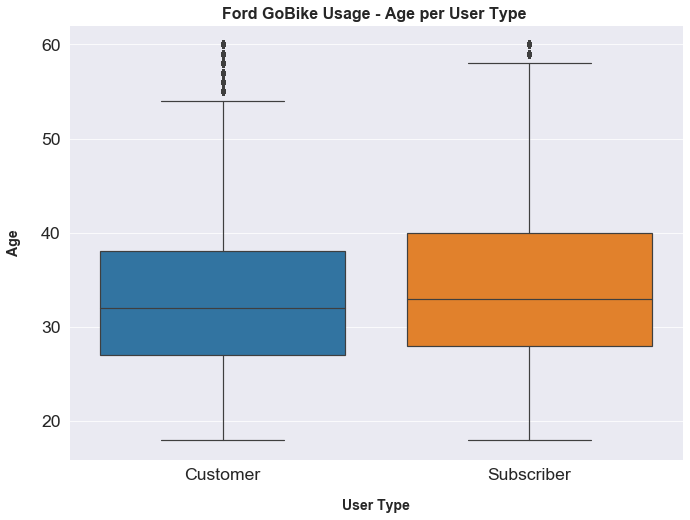

In [64]:
# Ford go bike usage - Age per User Type
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
sns.boxplot(data = clean_df, x = 'user_type', y = 'member_age');
plt.title('Ford GoBike Usage - Age per User Type ',fontsize=16,fontweight='bold')
plt.xlabel('User Type', labelpad=16, fontweight='bold',fontsize=14)
plt.ylabel('Age', labelpad=20,fontweight='bold',fontsize=14);

### Observation
 Subscribers contains more members in the age group 25-40 compared to customers

### Conclusion
  #### Findings <br>
 - Rides by subscribers are more centred around shorter duration and distance.
 - The hourly trend shows that for subscribers majority of the rides are taken during hours 8-9am and 5-6pm whereas for the customers the majority of the rides are taken from 11am to 7pm.
 - The weekly usage shows that subcribers take the rides mostly between days Monday to Friday whereas the customers mostly take the rides on Saturday and Sunday.
    This shows that subscribers are taking the ride to commute whereas customers are taking the rides to enjoy their weekends.
 - Both the user types have same trends for month wise usage of bikes.Subscribers are take most monthly rides.2019-March and 2019-April being the months were most of the rides are taken.
 - The same trends also following the age group also. Subscribers contains more members in the age group 25-40 compared to customers.

### 3. Exploring the correlation between different variables

### Visualizing the correlation between duartion,distance and member age

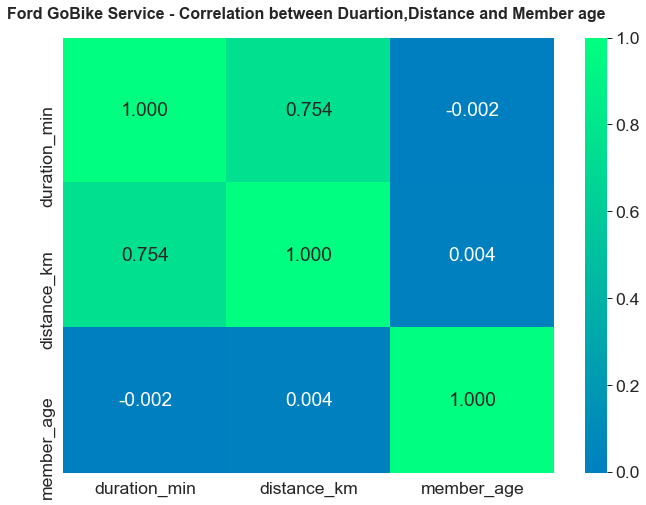

In [65]:
numeric_vars = ['duration_min','distance_km','member_age']
plt.figure(figsize=(11,8))
plt.title('Ford GoBike Service - Correlation between Duartion,Distance and Member age ',y=1.03,fontsize=16,fontweight='bold')
sns.set_context("paper", font_scale=2) 
sns.heatmap(clean_df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'winter', center = 0)
plt.show()

<Figure size 792x576 with 0 Axes>

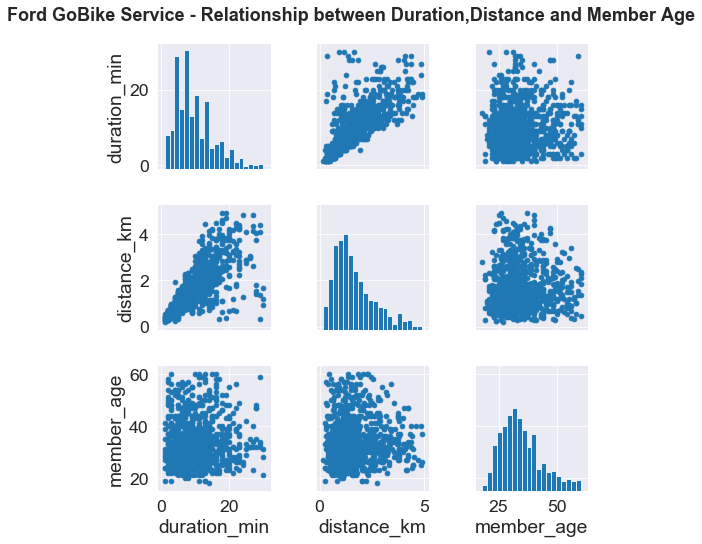

In [66]:
# taking 1000 samples of data
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
samples = np.random.choice(clean_df.shape[0],1000,replace=False)
data_samp = clean_df.loc[samples,:]

g = sns.PairGrid(data = data_samp, vars = numeric_vars);
g.fig.suptitle('Ford GoBike Service - Relationship between Duration,Distance and Member Age', y=1.02, fontsize=18, fontweight='bold')
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

### Observation
 The duration and distance are highly correlated with each other. On the other hand, member age has less correlation with both the duration and the distance.

### Plotting - the distance, duration,member_age against generic categorical features

In [67]:
def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[9]
    sns.boxplot(x, y, color = default_color)

<Figure size 792x576 with 0 Axes>

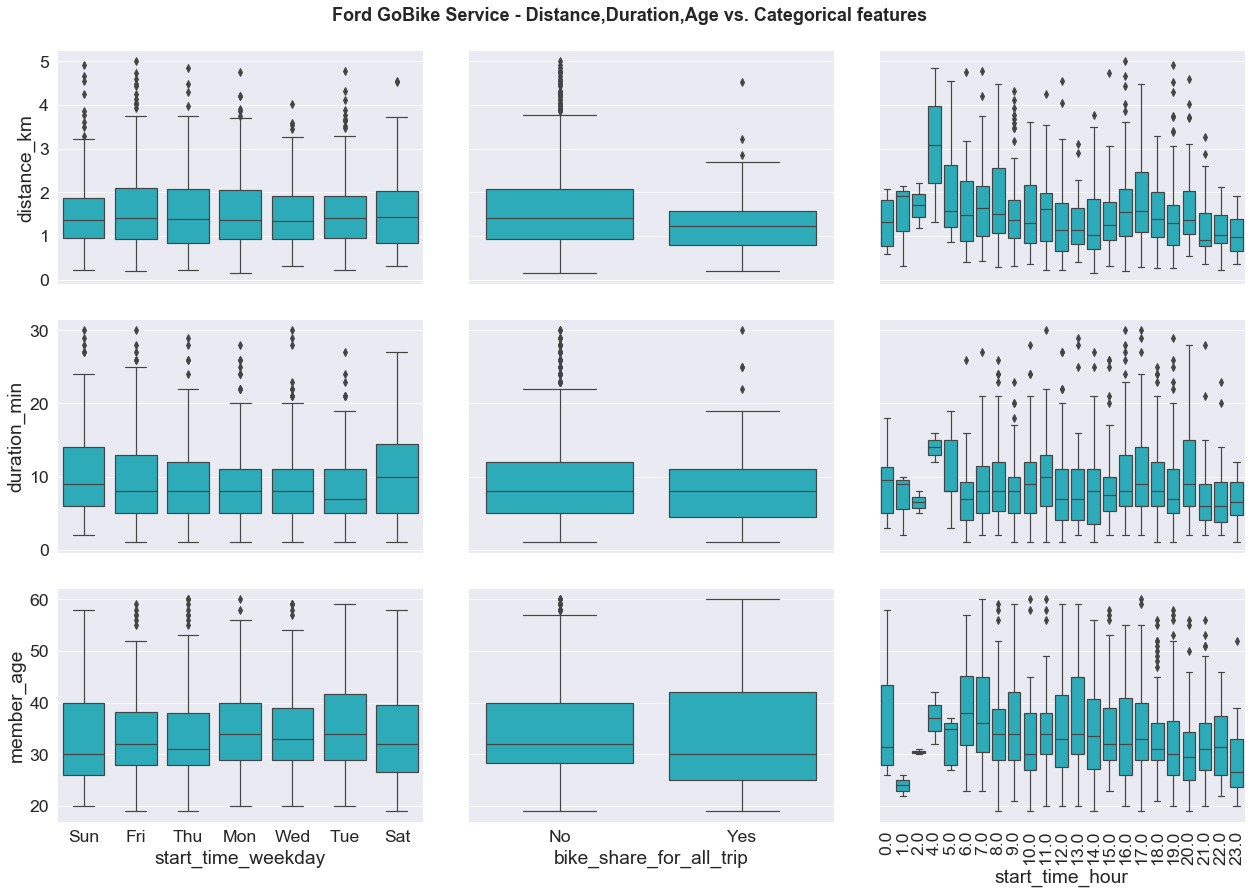

In [68]:
samples = np.random.choice(clean_df.shape[0], 1000, replace = False)
data_samp = clean_df.loc[samples,:]
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
g = sns.PairGrid(data = data_samp, y_vars = ['distance_km', 'duration_min','member_age'],
                x_vars = ['start_time_weekday','bike_share_for_all_trip','start_time_hour'],
                size = 4, aspect = 1.5)
g.fig.suptitle('Ford GoBike Service - Distance,Duration,Age vs. Categorical features', y=1.02, fontsize=18, fontweight='bold');
g.map(boxgrid)
plt.xticks( rotation=90 )
plt.show();

### Observation
It shows that hours,weekdays and bike_share_for_all_trip all have obvious impact on duration,distance,member age.
Weekday type has an impact on duration but limited impact on distance.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 - From above plots we obsereved that all the genders follow the same trends. They have similar ride durations and monthly,weekly,hourly usage.
 - For different user type we observed that customer takes more rides on weekends and subscribers take more rides from Monday to Friday. Similarly the hourly and monthly usage trends also differ for subscribers and customers.
 - From correlation plot,the duration and distance are highly correlated with each other. On the other hand, member age has less correlation with both the duration and the distance.
    The distance, duration,member_age have impact on categorical features also.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
No.

<a id='multivariate'></a>
## Multivariate Exploration

Create plots of three or more variables for further investigation. Make sure that your investigations are justified and follow from your work in the previous sections.

### Exploring The Ford GoBike usage trends for all user type per gender wise

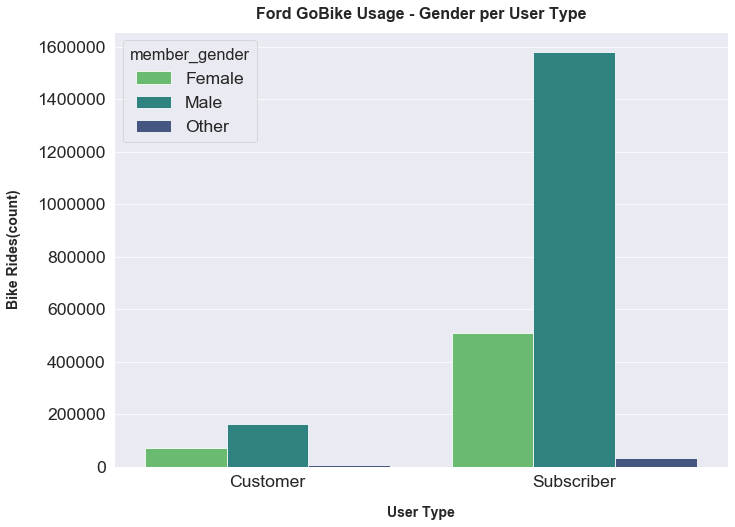

In [69]:
# The Ford GoBike usage trends for all user_type per gender wise
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
ax = sns.countplot(data = clean_df, x = 'user_type', hue = 'member_gender',palette= 'viridis_r')
plt.title('Ford GoBike Usage - Gender per User Type', fontsize=16, y=1.015,fontweight='bold')
plt.xlabel('User Type', labelpad=16, fontweight='bold',fontsize=14)
plt.ylabel('Bike Rides(count)', labelpad=16,fontweight='bold',fontsize=14);

### Observation
- Both the user types had majority of users are Males.
- Subscribers using the service more compared to customers.

### Visualizing the duration of mins of Ford GoBike usage trends for all user type per gender wise

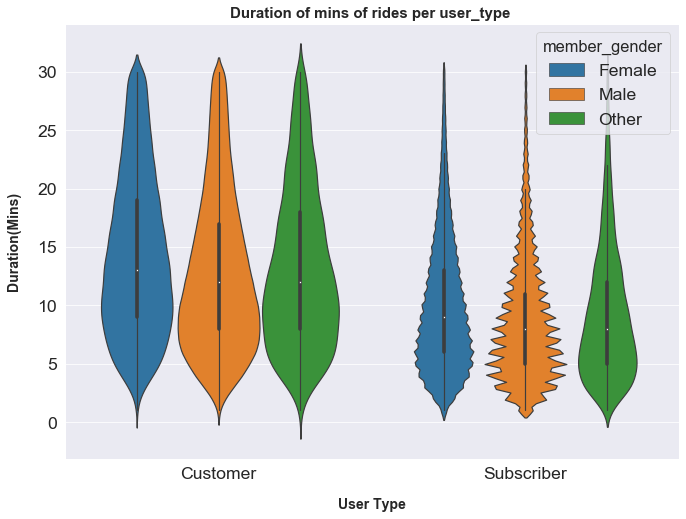

In [70]:
# Violin Plot to analyse duration of mins of rides per user type and gender
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
plt_v=sns.violinplot(data = clean_df, x = 'user_type', y = 'duration_min',hue='member_gender')
ax.legend(loc = 7, framealpha = 0.2,title='Gender') 
plt.title('Duration of mins of rides per user_type ',fontsize=15,fontweight='bold');
plt.xlabel('User Type', labelpad=16, fontweight='bold',fontsize=14)
plt.ylabel('Duration(Mins)', labelpad=16,fontweight='bold',fontsize=14);

### Observation
The Customer user type have more rides of longer durations.

### Visulaizing hourly usage of Ford GoBike System per user type and gender

<Figure size 792x576 with 0 Axes>

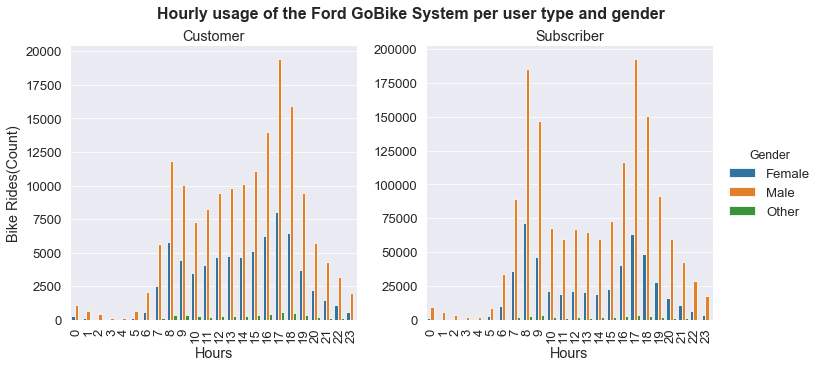

In [71]:
#hourly usage of Ford GoBike System per user type and gender
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=1.5) 
g = sns.catplot(data=clean_df, x='start_time_hour',col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hours", "Bike Rides(Count)")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the Ford GoBike System per user type and gender', y=1.02, fontsize=16, fontweight='bold')
g.set_xticklabels(rotation=90);

### Observation
- User type Subscriber uses the service more during the the hours 8-9am and 5-6 pm showing that they are using the service to commute to workplace and back home. The user type customer on the other hand use the service most during hours 11 am to 7 pm
- Gender - Males uses the service more for both user-types.

### Visulaizing weekly usage of Ford GoBike System per user type and gender

<Figure size 792x576 with 0 Axes>

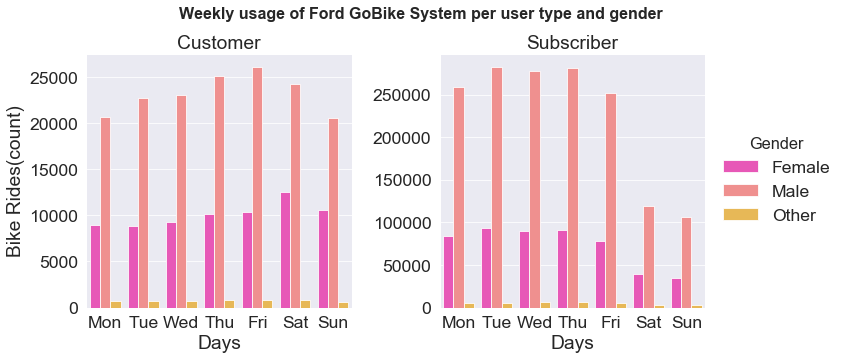

In [72]:
# plot the weekday usage of Ford GoBike System  per user type and gender
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=clean_df, x='start_time_weekday', col="user_type", palette= 'spring' ,hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Days", "Bike Rides(count)")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of Ford GoBike System per user type and gender', y=1.02, fontsize=16, fontweight='bold');

### Observation
- User type Subscriber uses the service more during the working days (Monday-Friday) whereas user type Customer use the service most during the weekends (Saturday-Sunday).
- Gender - Males uses the service more for both user-types.

### Visulaizing monthly usage of Ford GoBike System per user type and gender

<Figure size 792x576 with 0 Axes>

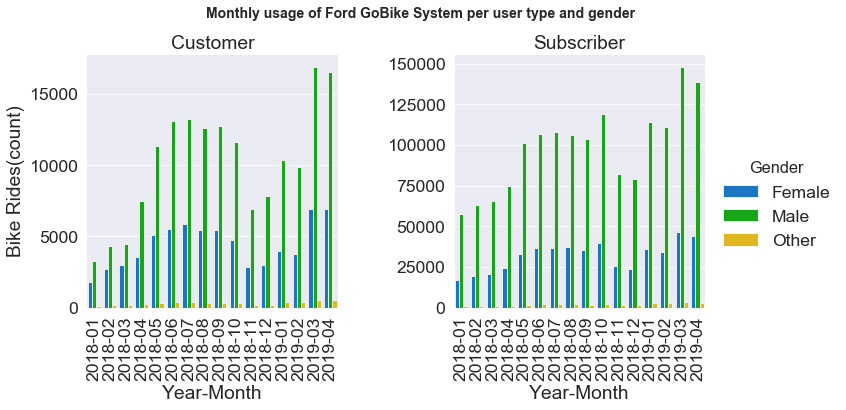

In [73]:
# plot monthly trends of  Ford GoBike System per user type and gender
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
g = sns.catplot(data=clean_df, x='start_time_year_month',palette='nipy_spectral', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Year-Month", "Bike Rides(count)")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of Ford GoBike System per user type and gender', y=1.02, fontsize=14, fontweight='bold');
g.set_xticklabels(rotation=90);

### Observation
- User type Subscriber uses the service more in the intial months of the year 2018  whereas the user type customer use the service more in the months April to September in the year 2018.
- From october 2018 to April 2019 Subscribers are used the service more than Customers
- Gender - Males uses the service more for both user-types.

## Visualizing the relationships of Numeric variables vs. Categorical variables 

### Plotting heatmaps on Duration,Hours and Days of week

In [74]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(1, 25, 1)
    bins_y = np.arange(0, y.max()+y.max()/20, y.max()/20)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

<Figure size 792x576 with 0 Axes>

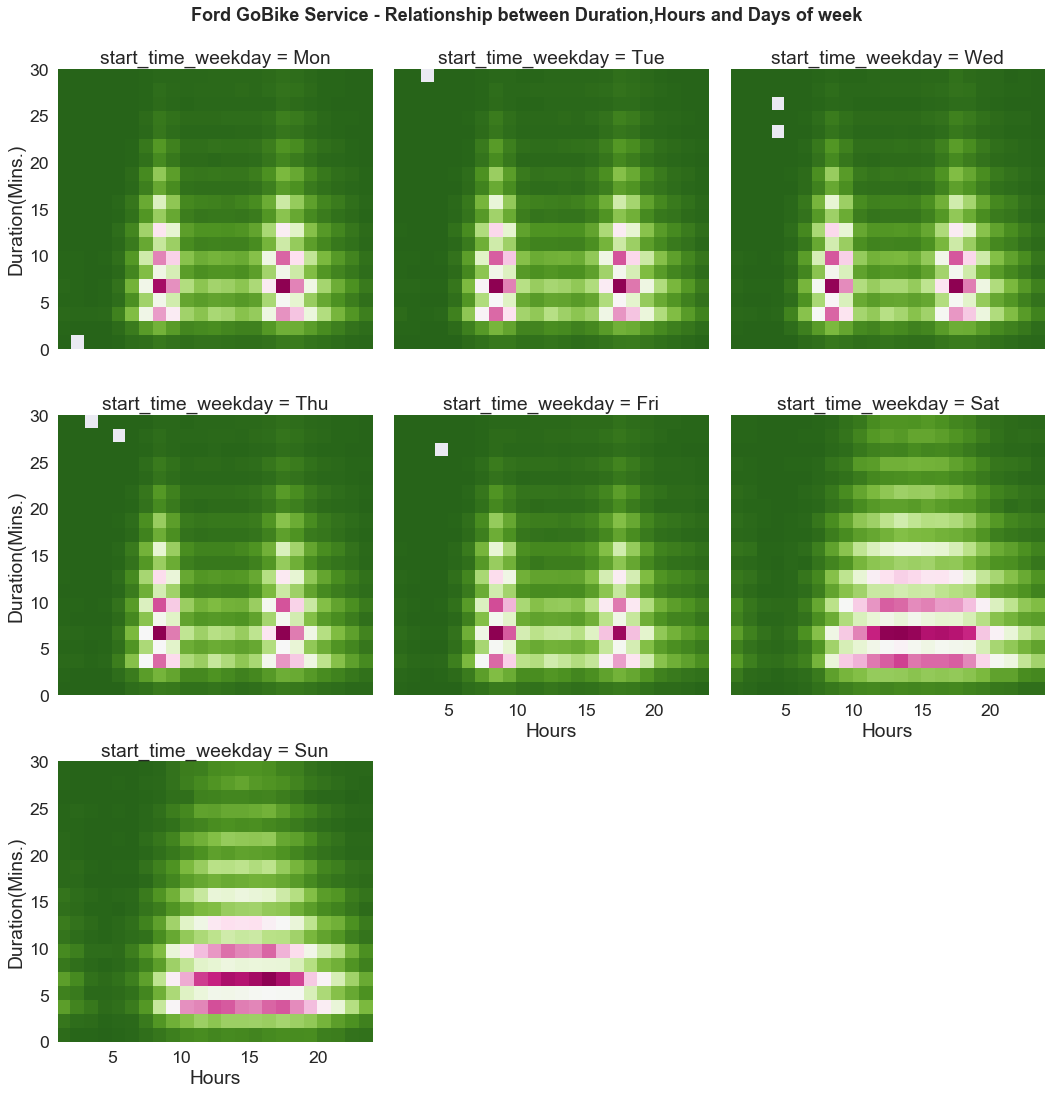

In [75]:
# create faceted heat maps on start hour, duration, and days of the week 
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.FacetGrid(data = clean_df, col = 'start_time_weekday',size=5, col_wrap=3,col_order= weekday)
g.map(hist2dgrid, 'start_time_hour', 'duration_min', color = 'PiYG_r')
g.set_xlabels('Hours')
g.set_ylabels('Duration(Mins.)')
g.fig.suptitle('Ford GoBike Service - Relationship between Duration,Hours and Days of week', y=1.02, fontsize=18, fontweight='bold')
plt.show()

### Observartion
- On weekdays, there are more trips during two peak periods (7-10am and 4-7pm), but in weekends trips are normal distributed throughout the day between 7am-10pm. 
- Duration centred between 5-10 minutes on both weekdays and weekends, but the trend  for longer trips are different. Two peak periods 7-10am and 4-7pm on weekdays, and 1pm-4pm on weekends.

### Plotting heatmaps on Duration,Hours and Bike share for all trip

<Figure size 792x576 with 0 Axes>

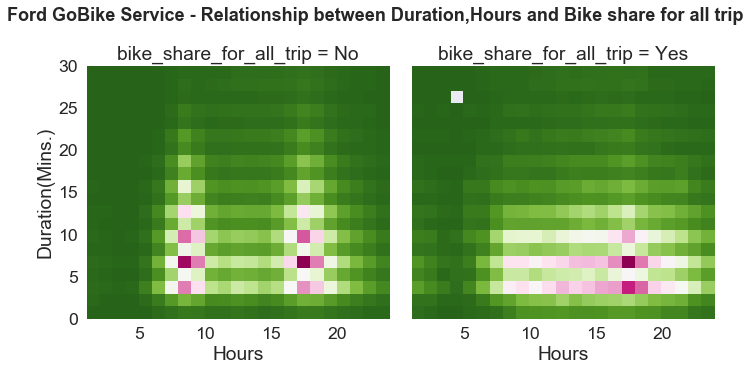

In [76]:
# create faceted heat maps on start hour, duration, and Bike share for all trip 
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
g = sns.FacetGrid(data = clean_df, col = 'bike_share_for_all_trip', col_wrap=2, size = 5)
g.map(hist2dgrid, 'start_time_hour', 'duration_min', color = 'PiYG_r')
g.set_xlabels('Hours')
g.set_ylabels('Duration(Mins.)')
g.fig.suptitle('Ford GoBike Service - Relationship between Duration,Hours and Bike share for all trip', y=1.05, fontsize=18, fontweight='bold')
plt.show()

### Observation
 - From above, we can see the pattern is different when users use Ford GoBike service for the entire trip vs. samller trips.
     - When users use bike share for only part of the trip, the behavior is similar to that on weekdays we observed,two peak periods between 7-10am and 4-6pm, with more longer trips happening in those two periods. This concludes that people tend to use more Ford GoBike service as part of the trip during the weekdays.   
     - When users use bike share for the entire ride, the behavior is similar to that on weekends.The duration is more centred between 3-10 minutes, so people are less likely to use this service for longer rides over the weekend. 

### Plotting heatmaps on Distance,Hours and Days of the week

<Figure size 792x576 with 0 Axes>

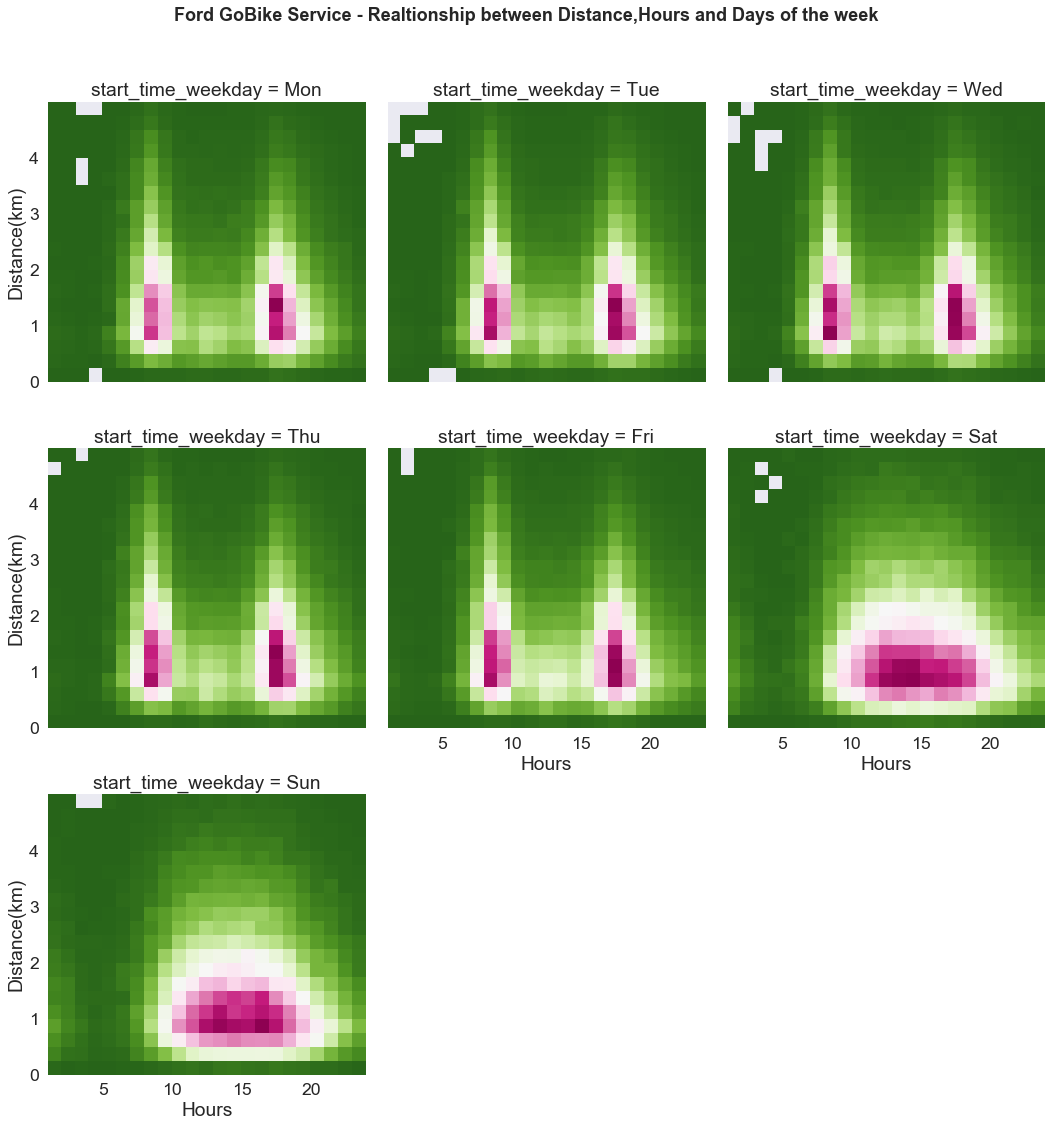

In [77]:
# create faceted heat maps on start hour, distance, and days of the week 
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.FacetGrid(data = clean_df, col = 'start_time_weekday', col_wrap=3, size = 5,col_order= weekday)
g.map(hist2dgrid, 'start_time_hour', 'distance_km', color = 'PiYG_r')
g.set_xlabels('Hours')
g.set_ylabels('Distance(km)')
g.fig.suptitle('Ford GoBike Service - Realtionship between Distance,Hours and Days of the week', y=1.05, fontsize=18, fontweight='bold')
plt.show()

### Observation
- On weekdays, there are more trips during two peak periods (7-10am and 4-7pm), but weekends rides are normal distributed throughout the day between 7am-10pm. 
- The trend for longer trips are different - longer trips happen around the two 7-10am and 4-7pm peak periods on weekdays, and 1pm-4pm on weekends.

### Plotting heatmaps on Distance,Hours and Bike share for all trip

<Figure size 792x576 with 0 Axes>

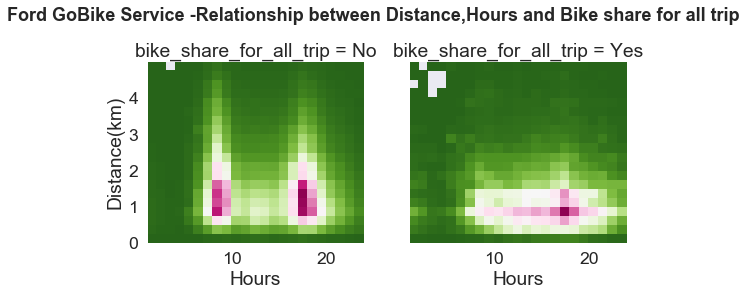

In [78]:
# create faceted heat maps on start hour, distance, and share for all trip
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
g = sns.FacetGrid(data = clean_df, col = 'bike_share_for_all_trip', col_wrap=2, size = 4)
g.map(hist2dgrid, 'start_time_hour', 'distance_km', color = 'PiYG_r')
g.set_xlabels('Hours')
g.set_ylabels('Distance(km)')
g.fig.suptitle('Ford GoBike Service -Relationship between Distance,Hours and Bike share for all trip', y=1.05, fontsize=18, fontweight='bold')
plt.show()

### Observation
- When users use bike share for only part of the trip, the behavior is similar to that on weekdays.Longer rides happening in two peak periods between 7-10am and 4-6pm. This concluded that people uses bike share as part of the trip during the weekdays.
- When users use bike share for the entire ride, the behavior is similar to that on weekends. The distance is more centred between 0.5-1.5km, suggesting people are less likely to use bike share for longer rides over the weekend.

### Plotting heatmaps on Age,Hours and Days of the week

In [79]:
def hist2dgrid_age(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(1, 25, 1)
    bins_y = np.arange(18, 61, 1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

<Figure size 792x576 with 0 Axes>

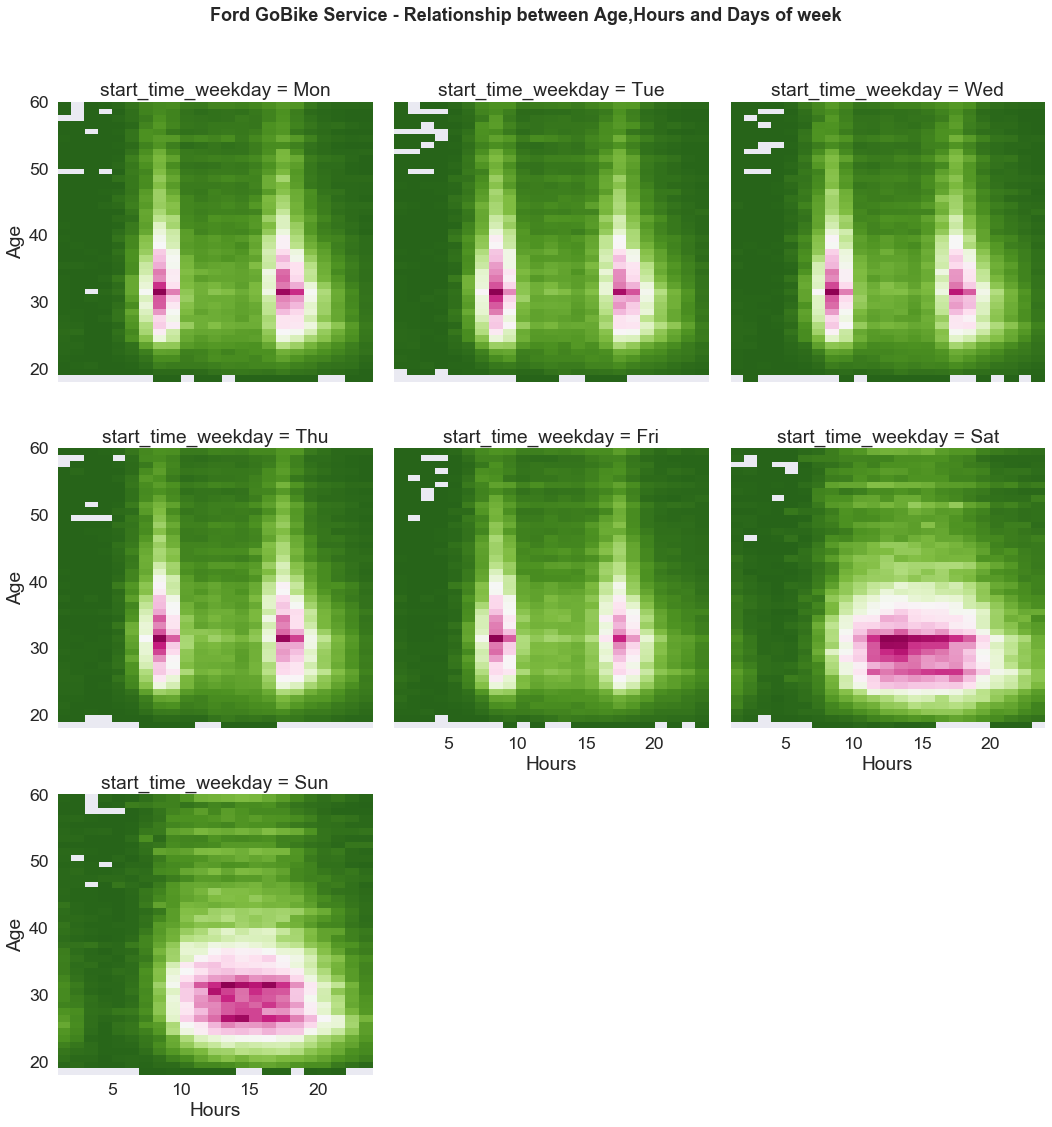

In [80]:
# create faceted heat maps on start hour,age and days of the week 
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.FacetGrid(data = clean_df, col = 'start_time_weekday', col_wrap=3, size = 5,col_order= weekday)
g.map(hist2dgrid_age, 'start_time_hour', 'member_age', color = 'PiYG_r')
g.set_xlabels('Hours')
g.set_ylabels('Age')
g.fig.suptitle('Ford GoBike Service - Relationship between Age,Hours and Days of week', y=1.05, fontsize=18, fontweight='bold')
plt.show()

### Observation
- On weekdays, peak hour trips are taken by adults aged between 25-40.
- On weekends, peak hour trips are taken by adults having the age between 20-35.

### Plotting heatmaps on Age,Hours and Bike share for all trip

<Figure size 792x576 with 0 Axes>

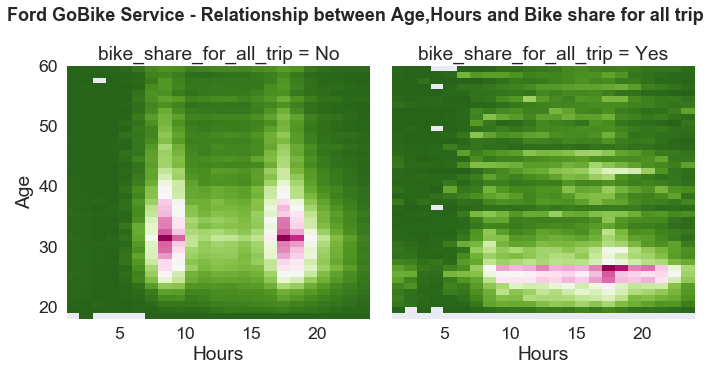

In [81]:
# create faceted heat maps on start hour, age, and Bike share for all trip
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
g = sns.FacetGrid(data = clean_df, col = 'bike_share_for_all_trip', col_wrap=2, size = 5)
g.map(hist2dgrid_age, 'start_time_hour', 'member_age', color = 'PiYG_r')
g.set_xlabels('Hours')
g.set_ylabels('Age')
g.fig.suptitle('Ford GoBike Service - Relationship between Age,Hours and Bike share for all trip', y=1.05, fontsize=18, fontweight='bold')
plt.show()

 ### Observation
- When users use bike share for only part of the trip, the behavior is similar to that on weekdays.Longer rides happening in two peak periods between 7-10am and 4-6pm and that is in the age group of 25-40. This concluded that people uses bike share as part of the trip during the weekdays.
- When users use bike share for the entire ride, the behavior is similar to that on weekends. The age is more centred between 20-35, suggesting people are less likely to use bike share for longer rides over the weekend.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?¶

### Findings
- Both the user types had majority of users are Males.
- Subscribers using the service more compared to customers
- The Customer user type have more rides of longer durations
- User type Subscriber uses the service more during the the hours 8-9am and 5-6 pm showing that they are using the service to commute to workplace and back home. 
- The user type customer on the other hand use the service most during hours 11 am to 7 pm.
- User type Subscriber uses the service more during the working days (Monday-Friday) whereas user type Customer use the service most during the weekends (Friday-Sunday).
- User type Subscriber uses the service more in the intial months of the year 2018 whereas the user type customer use the service more in the months April to September in the year 2018.
- From october 2018 to April 2019 Subscribers are used the service more than Customers
- On weekdays, there are more trips during two peak periods (7-10am and 4-7pm), but in weekends trips are normal distributed throughout the day between 7am-10pm.
- The trend for longer trips are different - longer trips happen around the two 7-10am and 4-7pm peak periods on weekdays, and 1pm-4pm on weekends.
- On weekdays, peak hour trips are taken by adults aged between 25-40.
- On weekends, peak hour trips are taken by adults having the age between 20-35.

### Were there any interesting or surprising interactions between features?
No

<a id='resources'></a>
## Resources

https://www.udacity.com
    
https://stackoverflow.com/questions/3451111/unzipping-files-in-python

https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/
    
https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html   
    
https://seaborn.pydata.org/generated/seaborn.catplot.html
    
https://seaborn.pydata.org/generated/seaborn.PairGrid.html    
    
https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
    
https://matplotlib.org/tutorials/colors/colormaps.html    
    
https://seaborn.pydata.org/tutorial/color_palettes.html    